In [1]:
from google.colab import files
uploaded = files.upload()  



Saving Set_up_for_performing.py to Set_up_for_performing.py
Saving test_data.csv to test_data.csv
Saving train_data.csv to train_data.csv


In [42]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from datetime import datetime
from Set_up_for_performing import  perform_model, print_grid_search_attributes, plot_confusion_matrix

In [43]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:

# Load the CSV files
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')


# Print to verify
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Train shape: (203001, 42)
Test shape: (41810, 42)


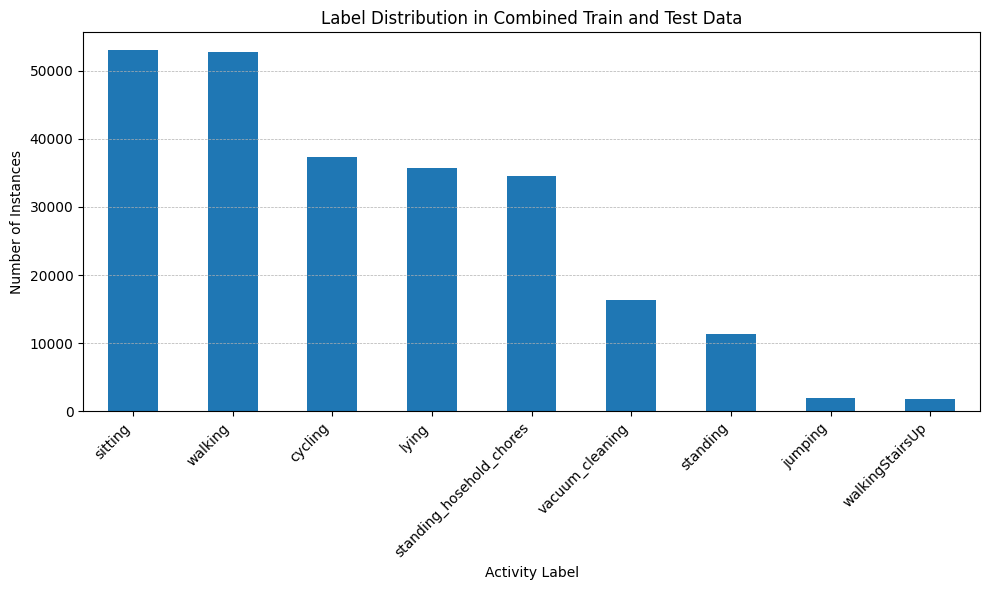

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# Combine datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Count label occurrences
label_counts = combined_data['label'].value_counts().sort_values(ascending=False)

# Plot the label distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution in Combined Train and Test Data')
plt.xlabel('Activity Label')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [46]:
print("train shape:", train_data.shape)
print("Unique labels in train:", train_data['label'].unique())

train shape: (203001, 42)
Unique labels in train: ['cycling' 'jumping' 'lying' 'sitting' 'standing'
 'standing_hosehold_chores' 'vacuum_cleaning' 'walking' 'walkingStairsUp']


In [47]:
print("test shape:", test_data.shape)
print("Unique labels in test:", test_data['label'].unique())

test shape: (41810, 42)
Unique labels in test: ['cycling' 'jumping' 'lying' 'sitting' 'standing'
 'standing_hosehold_chores' 'vacuum_cleaning' 'walking' 'walkingStairsUp']


In [48]:
print("Original label counts in train:\n", train_data['label'].value_counts())
print("\nOriginal label counts in test:\n", test_data['label'].value_counts())


Original label counts in train:
 label
sitting                     45741
walking                     39909
lying                       30654
cycling                     30339
standing_hosehold_chores    29380
vacuum_cleaning             13573
standing                    10254
jumping                      1678
walkingStairsUp              1473
Name: count, dtype: int64

Original label counts in test:
 label
walking                     12929
sitting                      7264
cycling                      6989
standing_hosehold_chores     5201
lying                        5027
vacuum_cleaning              2744
standing                     1109
jumping                       298
walkingStairsUp               249
Name: count, dtype: int64


In [49]:
import pandas as pd

# Empty DataFrames to store the results
train_2 = pd.DataFrame()
test_data_new = pd.DataFrame()

# Go through each user_id
for user in test_data['user_id'].unique():
    user_data = test_data[test_data['user_id'] == user]

    # Go through each label for this user
    for label in user_data['label'].unique():
        user_label_data = user_data[user_data['label'] == label]

        # Calculate how many samples are 5% (at least 1)
        n_samples = max(1, int(0.05 * len(user_label_data)))

        # Split: first 5% to train_2, rest stays in test_data_new
        train_2 = pd.concat([train_2, user_label_data.iloc[:n_samples]])
        test_data_new = pd.concat([test_data_new, user_label_data.iloc[n_samples:]])

# Reset index to keep things clean
train_2 = train_2.reset_index(drop=True)
test_data = test_data_new.reset_index(drop=True)

# Check results
print("Train_2 shape:", train_2.shape)
print("New Test_data shape:", test_data_new.shape)


Train_2 shape: (2070, 42)
New Test_data shape: (39740, 42)


In [50]:
# Label counts per user in train_2
print("\nLabel counts per user in train_2:")
print(train_2.groupby(['user_id', 'label']).size())

# Label counts per user in new test_data
print("\nLabel counts per user in new test_data:")
print(test_data_new.groupby(['user_id', 'label']).size())



Label counts per user in train_2:
user_id  label                   
1        cycling                     122
         jumping                       2
         lying                        47
         sitting                      78
         standing                      8
         standing_hosehold_chores     51
         vacuum_cleaning              25
         walking                     130
         walkingStairsUp               2
2        cycling                     120
         jumping                       2
         lying                        51
         sitting                      77
         standing                      8
         standing_hosehold_chores     52
         vacuum_cleaning              30
         walking                     128
         walkingStairsUp               3
3        cycling                     106
         jumping                       3
         lying                        49
         sitting                      78
         standing            

In [51]:
# Overall label count in train_2
print("\nLabel counts in train_2:")
print(train_2['label'].value_counts())

# Overall label count in new test_data
print("\nLabel counts in new test_data:")
print(test_data_new['label'].value_counts())



Label counts in train_2:
label
walking                     644
sitting                     361
cycling                     348
standing_hosehold_chores    257
lying                       249
vacuum_cleaning             135
standing                     53
jumping                      12
walkingStairsUp              11
Name: count, dtype: int64

Label counts in new test_data:
label
walking                     12285
sitting                      6903
cycling                      6641
standing_hosehold_chores     4944
lying                        4778
vacuum_cleaning              2609
standing                     1056
jumping                       286
walkingStairsUp               238
Name: count, dtype: int64


In [52]:
# Drop user_id column
train_data = train_data.drop(columns=['user_id'])
test_data = test_data.drop(columns=['user_id'])
train_2 = train_2.drop(columns=['user_id'])

In [53]:
train = train_data

In [54]:
test = test_data

In [55]:
# get X_train and y_train from csv files
X_train = train.drop(['label'], axis=1)
y_train = train.label

In [56]:

# get X_test and y_test from test csv file
X_test = train.drop(['label'], axis=1)
y_test = test.label

In [57]:
# Separate features and labels for training data
X_train = train.drop(columns=['label'])  # Drop the label column to get features
y_train = train['label']  # Select only the label column for targets

# Separate features and labels for testing data
X_test = test.drop(columns=['label'])  # Drop the label column to get features
y_test = test['label']  # Select only the label column for targets

X_train2 = train_2.drop(columns=['label'])  # Drop the label column to get features
y_train2 = train_2['label']  # Select only the label column for targets
# Print shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (203001, 40)
y_train shape: (203001,)
X_test shape: (39740, 40)
y_test shape: (39740,)


In [58]:
label = train['label'].unique().tolist()


## 1. Logistic regression



Training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done

Training time (HH:MM:SS.ms): 0:16:54.066905

Predicting test data...
Done

Testing time (HH:MM:SS:ms): 0:00:00.014594

---------------------
|      Accuracy      |
---------------------

    0.9463009562154001

--------------------
| Confusion Matrix |
--------------------

 [[ 6641     0     0     0     0     0     0     0     0]
 [    4   256     0     0    26     0     0     0     0]
 [    9     0  4742     4     0    23     0     0     0]
 [    0     0   691  6036    14   160     2     0     0]
 [    0     0     0     0  1049     7     0     0     0]
 [    0     0     4   256    19  4575    83     7     0]
 [    0     0     0    12    13   322  2238    24     0]
 [    0     3     0    14    14   203    61 11990     0]
 [    0     0     0     0     0    17     1   141    79]]


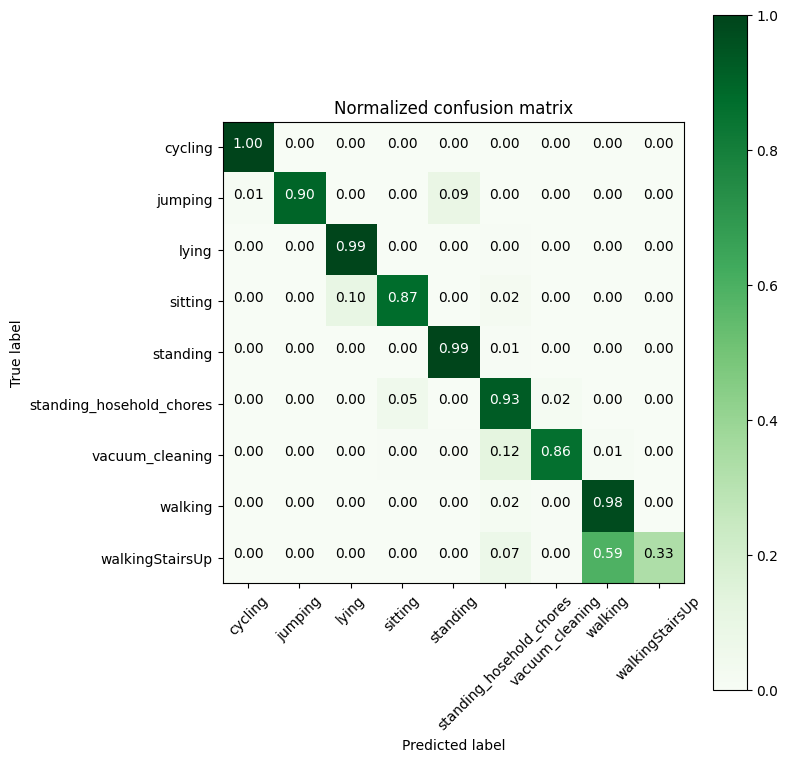

-------------------------
| Classification Report |
-------------------------
                          precision    recall  f1-score   support

                 cycling       1.00      1.00      1.00      6641
                 jumping       0.99      0.90      0.94       286
                   lying       0.87      0.99      0.93      4778
                 sitting       0.95      0.87      0.91      6903
                standing       0.92      0.99      0.96      1056
standing_hosehold_chores       0.86      0.93      0.89      4944
         vacuum_cleaning       0.94      0.86      0.90      2609
                 walking       0.99      0.98      0.98     12285
         walkingStairsUp       1.00      0.33      0.50       238

                accuracy                           0.95     39740
               macro avg       0.95      0.87      0.89     39740
            weighted avg       0.95      0.95      0.95     39740

--------------------------
|      Best Estimator     |
------

In [59]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Set up Grid Search for Logistic Regression
parameters = {'C': [0.01, 0.1, 1, 10, 20, 30], 'penalty': ['l2', 'l1']}
log_reg = linear_model.LogisticRegression(solver='liblinear')
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)

log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=label)
print_grid_search_attributes(log_reg_grid)



##Post train Logreg

In [60]:
# Combine the original and new training data
X_combined = np.concatenate((X_train, X_train2), axis=0)
y_combined = np.concatenate((y_train, y_train2), axis=0)

# Re-train the model on the combined dataset
log_reg_grid.fit(X_combined, y_combined)

# Evaluate
y_pred_updated = log_reg_grid.predict(X_test)
accuracy_updated = accuracy_score(y_test, y_pred_updated)
print("Accuracy after re-training on combined data:", accuracy_updated)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Accuracy after re-training on combined data: 0.9392048314041268


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


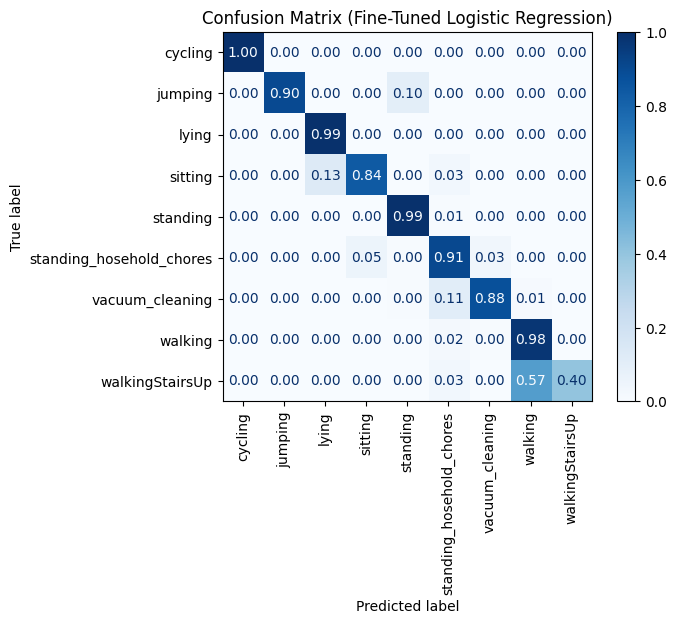

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm_updated = confusion_matrix(y_test, y_pred_updated, normalize='true')



disp = ConfusionMatrixDisplay(confusion_matrix=cm_updated, display_labels=best_log_reg.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical', values_format=".2f")
plt.title("Confusion Matrix (Fine-Tuned Logistic Regression)")
plt.show()


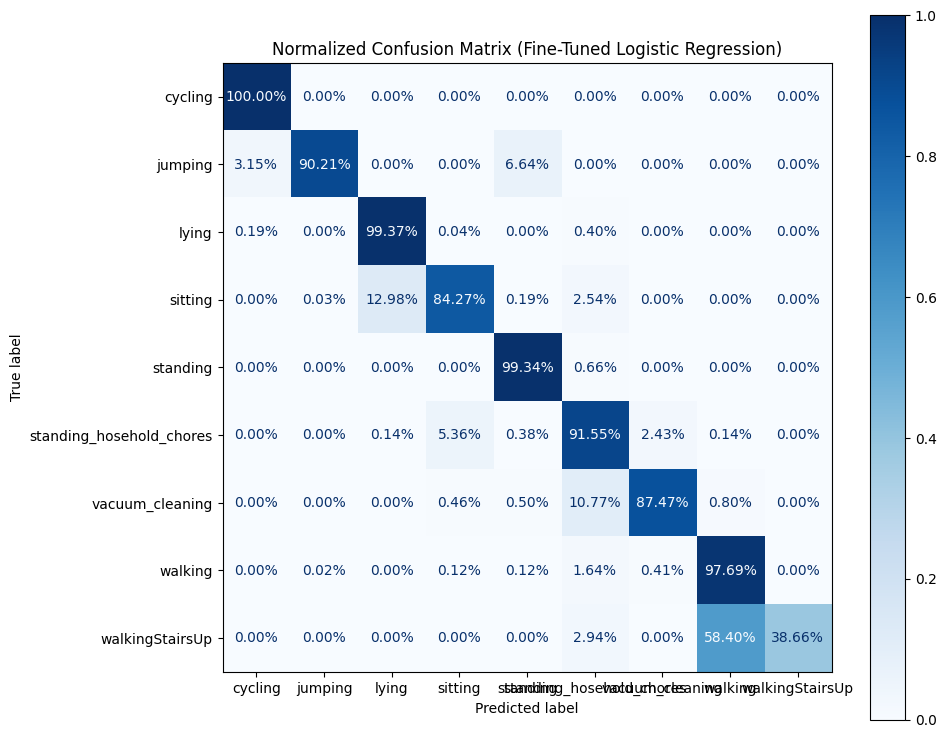

In [62]:
# Compute the raw confusion matrix
cm = confusion_matrix(y_test, y_pred_updated)

# Normalize the matrix row-wise (i.e., by true labels)
cm = confusion_matrix(y_test, y_pred_updated, normalize='true')

# Format percentages for annotation
cm_percent = np.round(cm_normalized)  # Convert to percent

# Display the confusion matrix with percentages
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=best_log_reg.classes_)
disp.plot(cmap='Blues', ax=ax, values_format='.2%')  # Show as percentages
plt.title("Normalized Confusion Matrix (Fine-Tuned Logistic Regression)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Simply print the classification report
print(classification_report(y_test, y_pred_updated))


                          precision    recall  f1-score   support

                 cycling       1.00      1.00      1.00      6641
                 jumping       0.99      0.90      0.94       286
                   lying       0.84      0.99      0.91      4778
                 sitting       0.95      0.84      0.89      6903
                standing       0.92      0.99      0.95      1056
standing_hosehold_chores       0.86      0.91      0.88      4944
         vacuum_cleaning       0.91      0.88      0.89      2609
                 walking       0.99      0.98      0.98     12285
         walkingStairsUp       1.00      0.40      0.57       238

                accuracy                           0.94     39740
               macro avg       0.94      0.88      0.89     39740
            weighted avg       0.94      0.94      0.94     39740



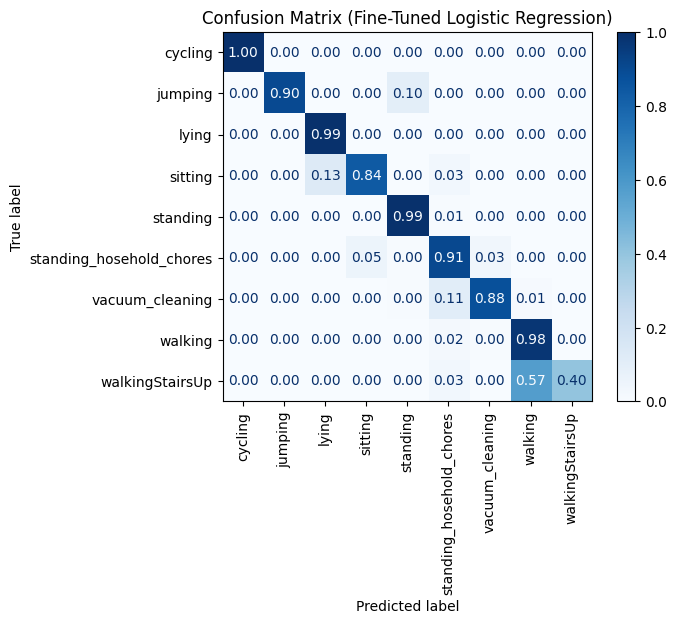

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm_updated = confusion_matrix(y_test, y_pred_updated, normalize='true')



disp = ConfusionMatrixDisplay(confusion_matrix=cm_updated, display_labels=best_log_reg.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical', values_format=".2f")
plt.title("Confusion Matrix (Fine-Tuned Logistic Regression)")
plt.show()


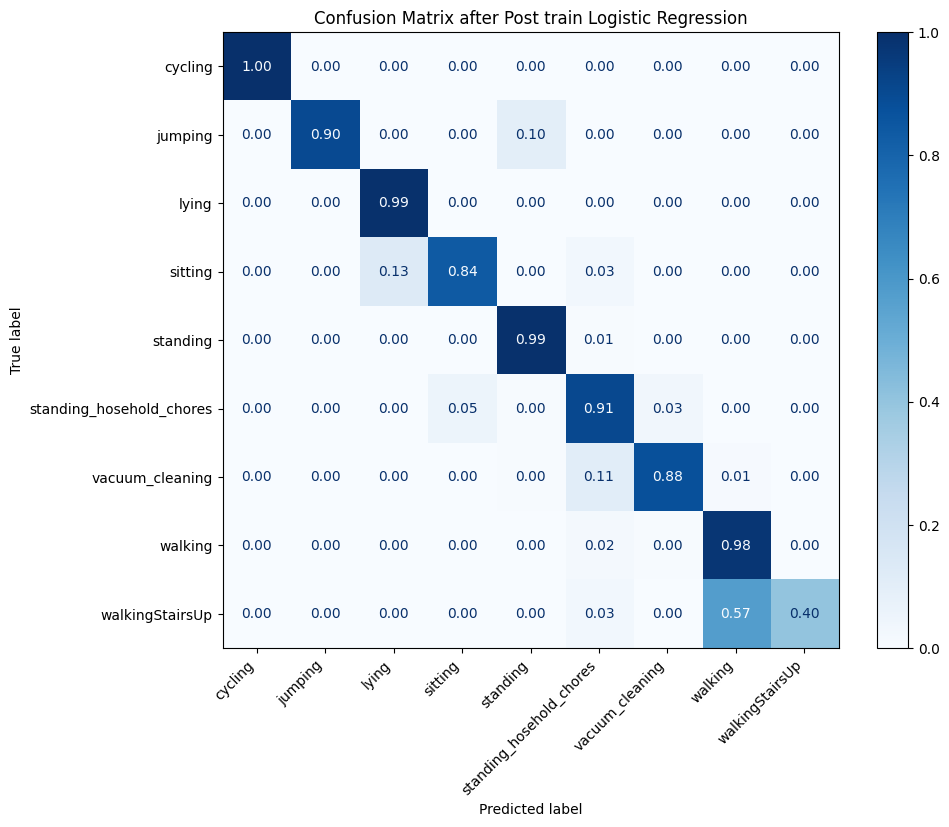

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_updated, normalize='true')

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_log_reg.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax, values_format=".2f")
plt.title("Confusion Matrix after Post train Logistic Regression")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define parameter grid
params = {'n_estimators': np.arange(10, 201, 20), 'max_depth': np.arange(3, 15, 2)}

# Create the classifier with warm_start enabled
rfc = RandomForestClassifier(warm_start=True)  # Important to set warm_start=True here
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)

rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=label)
print_grid_search_attributes(rfc_grid)




## Post train on Random Forest

In [ ]:
# Extract the best estimator from grid search
best_rfc = rfc_grid.best_estimator_

best_rfc.set_params(warm_start=True)

# Increase n_estimators to add new trees
best_rfc.n_estimators += 300

# Fine-tune on additional training data
best_rfc.fit(X_train2, y_train2)

# Evaluate the fine-tuned model on the original test data
y_pred_updated = best_rfc.predict(X_test)
accuracy_updated = accuracy_score(y_test, y_pred_updated)
print("Updated Accuracy:", accuracy_updated)

Updated Accuracy: 0.9680422747861097


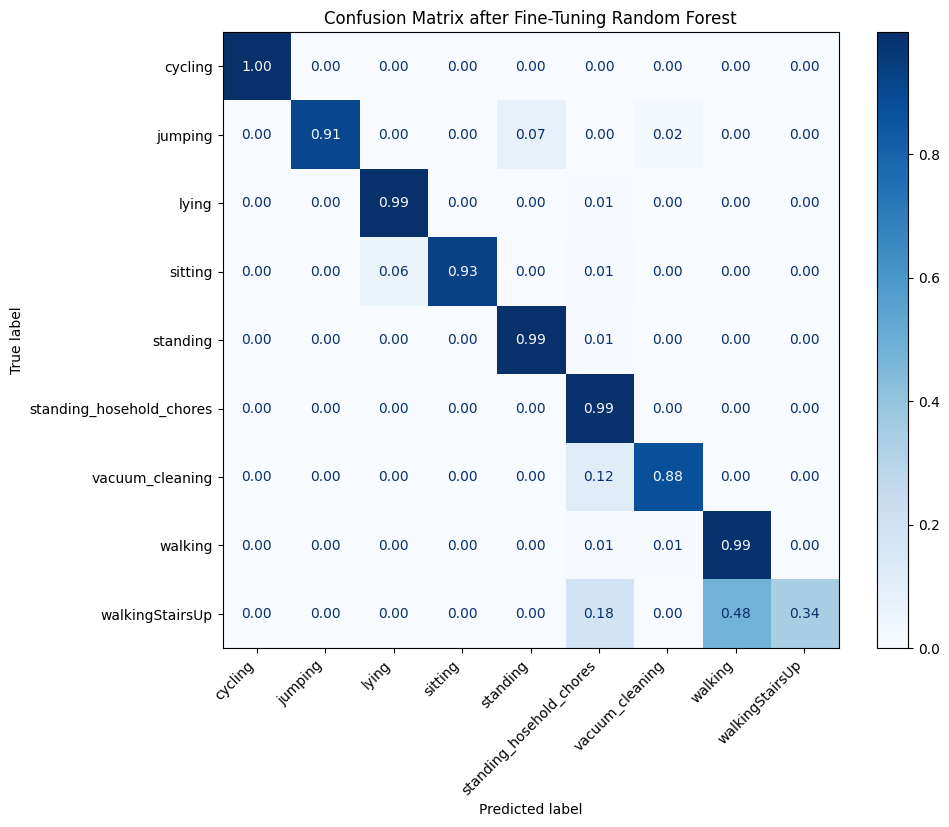

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_updated, normalize='true')

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rfc.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax, values_format=".2f")
plt.title("Confusion Matrix after Fine-Tuning Random Forest")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Simply print the classification report
print(classification_report(y_test, y_pred_updated))


                          precision    recall  f1-score   support

                 cycling       1.00      1.00      1.00      6641
                 jumping       1.00      0.91      0.95       286
                   lying       0.92      0.99      0.95      4778
                 sitting       1.00      0.93      0.96      6903
                standing       0.96      0.99      0.98      1056
standing_hosehold_chores       0.90      0.99      0.94      4944
         vacuum_cleaning       0.95      0.88      0.91      2609
                 walking       0.99      0.99      0.99     12285
         walkingStairsUp       1.00      0.34      0.51       238

                accuracy                           0.97     39740
               macro avg       0.97      0.89      0.91     39740
            weighted avg       0.97      0.97      0.97     39740



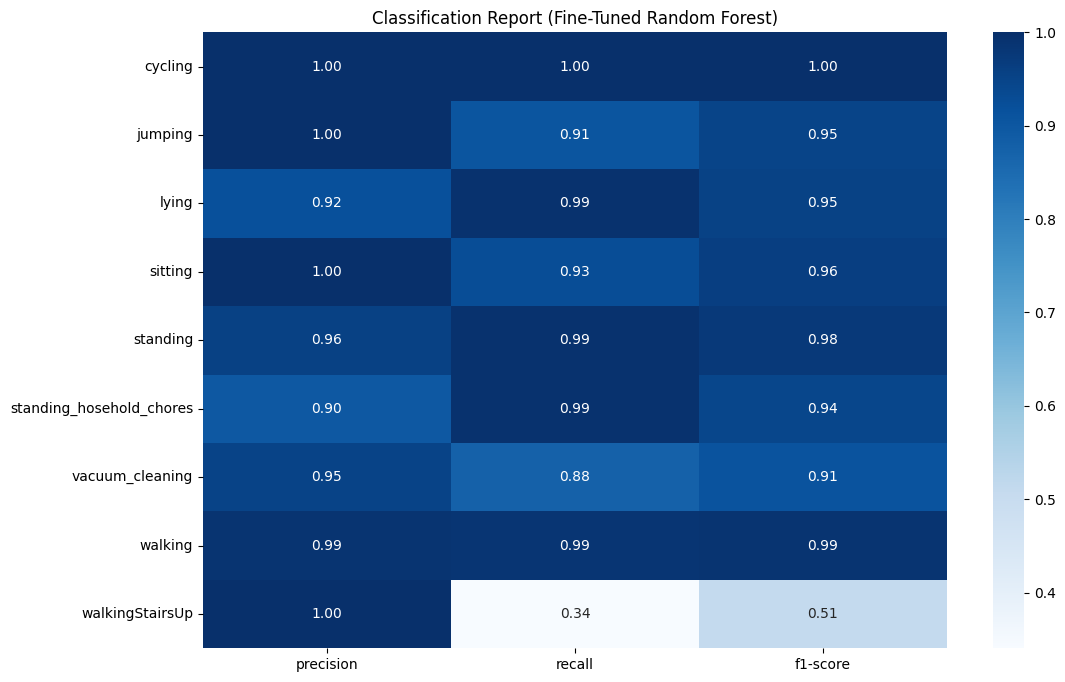

In [ ]:
# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred_updated, output_dict=True)

# Convert to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

report_df_classes = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(report_df_classes.iloc[:, :-1], annot=True, cmap="Blues", fmt=".2f")  # Skip 'support' column
plt.title("Classification Report (Fine-Tuned Random Forest)")
plt.yticks(rotation=0)
plt.show()